In [8]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import IPython.display as ipd
from scipy.io import wavfile
from scipy import signal
from scipy.io import wavfile as wav
from IPython.display import Audio
from scipy.io.wavfile import read

In [13]:
Audio(filename='C:/Users/ferna\Desktop/Notebook/TP_DESAFIO/vozjoao.wav')

C:\Users\ferna\Anaconda3\lib\site-packages\scipy\io\wavfile.py:273: WavFileWarning: Chunk (non-data) not understood, skipping it.
  WavFileWarning)


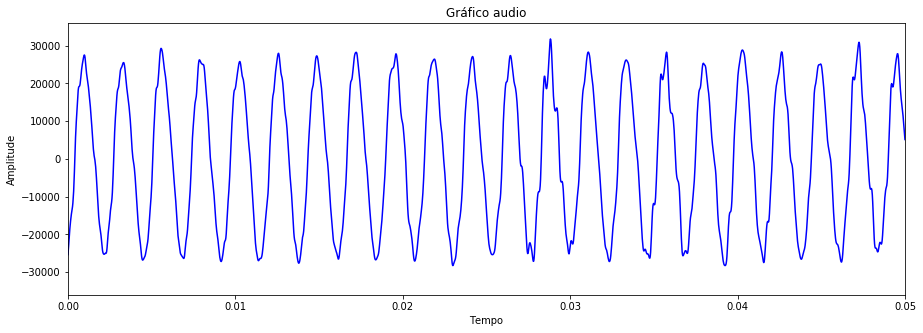

In [28]:
#rate,audData= sp.io.wavfile.read('C:/Users/ferna\Desktop/Notebook/TP_DESAFIO/vozjoao.wav')

input_data = read('C:/Users/ferna\Desktop/Notebook/TP_DESAFIO/vozjoao.wav')
sample_rate = input_data[0]
audio = input_data[1]

x_axis = np.linspace(0, len(audio)/sample_rate, len(audio)) ##Observação nessa função..explicação

plt.figure(figsize=(15,5))
plt.plot(x_axis, audio, 'b')
plt.ylabel("Amplitude")
plt.xlabel("Tempo")

plt.title("Gráfico audio")
plt.xlim((0,0.05))
plt.show()

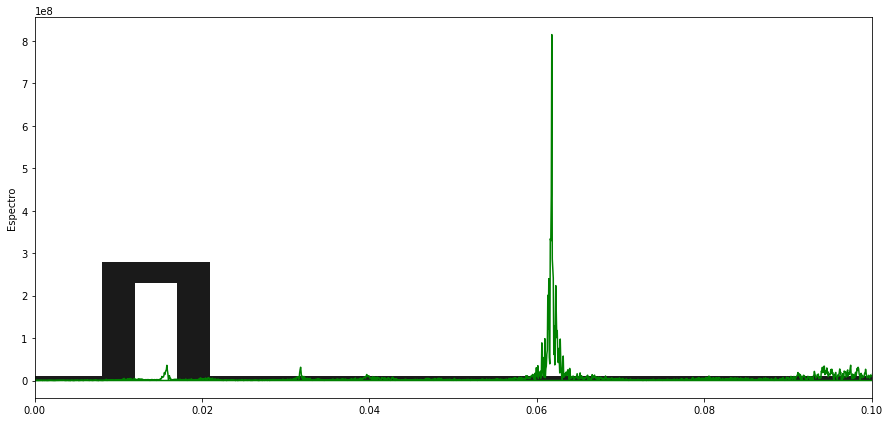

In [75]:
spectro = np.fft.fft(audio) #Criando FFT x(t)
freq = np.fft.fftfreq(len(audio), 1/2/np.pi)  #sinal domínio da frequencia

plt.figure(figsize=(15,7))
plt.plot(freq,(abs(spectro)),'g')
plt.ylabel('Espectro')

plt.fill([0.008, 0.008, 0.012, 0.012], [0, 2.3e8,  2.3e8, 0], '0.1') # banda de corte 1
plt.fill([0.008, 0.008,  0.021,  0.021], [2.3e8, 2.8e8, 2.8e8,2.3e8 ], '0.1', lw=0) # faixa ondulaçao de passagem
plt.fill([0.017, 0.017, 0.021, 0.021], [0, 2.3e8,  2.3e8, 0], '0.1') # banda de corte2
plt.fill([0.021, 0.021, 3, 3], [0, 0.1e8,  0.1e8, 0], '0.1') # faixa ondulação de rejeição 2
plt.fill([0, 0, 0.01, 0.01], [0, 0.1e8,  0.1e8, 0], '0.1') # faixa ondulação de rejeição 1

plt.xlim(0,0.1)

plt.show()

In [ ]:
plt.figure(figsize=(15,7))
plt.plot(freq,(abs(freq)),'g')
plt.ylabel('Espectro')

## Filtro IIR

In [87]:
Ap = 0.5    #dB
Ar = 65     #dB - Peso 
gp = -Ap
gr = -Ar

wr = (800)+25
wp = (800)-25

#wr_pa = 800*np.pi*(a1+a2)-150
#wp_pa = 800*np.pi*(a1+a2)-50

print ('WR =', wr)
print ('WP =', wp)

WR = 825
WP = 775


Ordem =  26


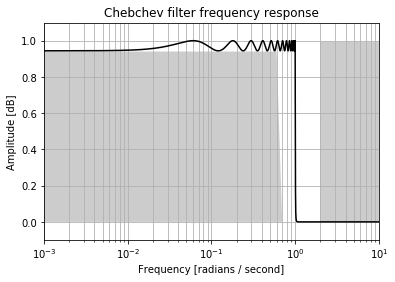

In [88]:
N,Wn = sp.signal.cheb1ord(wr,wp, Ap, Ar,analog = True) # Analisar os filtros Chebchevtipo 1 e 2, Butherworth, Eliptco
z,p,k = sp.signal.cheb1ap(N, Ap)
b,a = sp.signal.zpk2tf(z,p,k)
w, h = sp.signal.freqs(b, a, np.linspace(0, 10, 10000))
print ('Ordem = ', N)

plt.plot(w, (abs(h)),'black')
plt.xscale('log')
plt.title('Chebchev filter frequency response')
plt.xlabel('Frequency [radians / second]')
plt.ylabel('Amplitude [dB]')
plt.margins(0, 0.1)
plt.fill([0, 0,  0.6,  0.7], [0, .98,.94 ,0 ], '0.8', lw=0) # pass
plt.fill([2, 2, 10, 10], [0,  0.99,  0.99, 0], '0.8') # stop
plt.grid(which='both', axis='both')
plt.show()

C:\Users\ferna\Anaconda3\lib\site-packages\scipy\sparse\linalg\matfuncs.py:711: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number1.123400e-114
  return solve(Q, P)


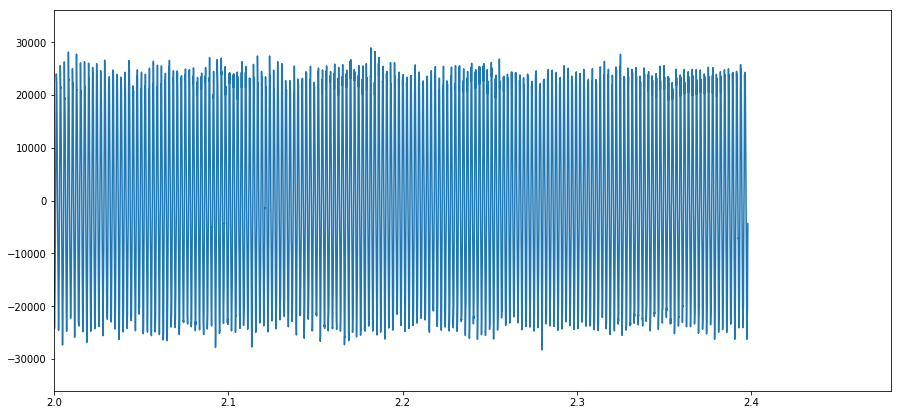

In [97]:
wo = (wp+wr)/2
q, o =sp.signal.lp2lp(b, a, wo)

#t = np.linspace(0,10,44100)
at,yout,xout=sp.signal.lsim((q,o), audio, x_axis)
Audio(yout,rate=sample_rate)

plt.figure(figsize=(15,7))
plt.plot(at,audio)
plt.xlim(2.0,2.48)
plt.show()

## Filtro FIR

In [123]:
filtro_audio = sp.signal.firwin(3001,[325,440], width=None, window='hamming', fs=sample_rate, pass_zero=0)

yaudio_filtrado = sp.signal.filtfilt(filtro_audio,1,audio) # filtro filtfilt

yaudio_filtrado_sp = np.fft.fft(yaudio_filtrado) 
yaudio_filtrado_freq = np.fft.fftfreq(len(yaudio_filtrado), 1/2/np.pi) 

Text(0,0.5,'Voz joao')

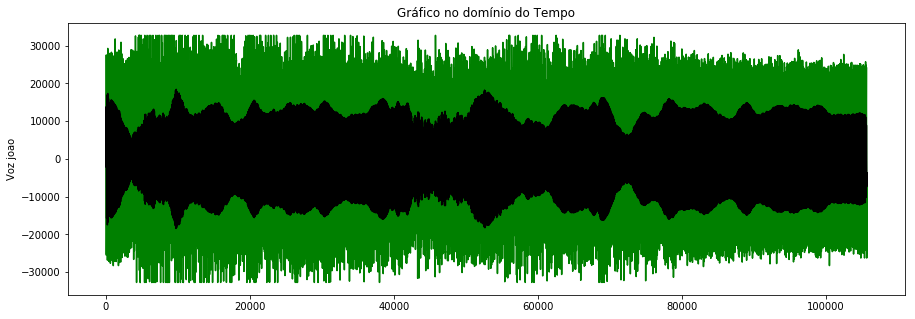

In [124]:
plt.figure(figsize=(15,35))

plt.subplot(611)
plt.plot((audio),'g')
plt.plot((yaudio_filtrado),'black')
plt.title('Gráfico no domínio do Tempo')
plt.ylabel('Voz joao')

(0.0, 0.1)

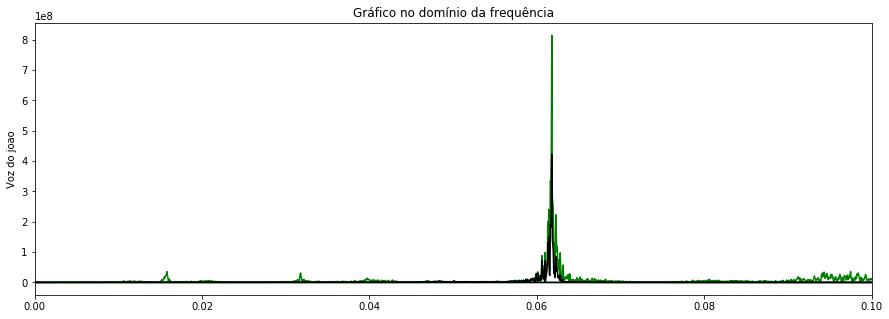

In [125]:
plt.figure(figsize =(15,35))

plt.subplot(6, 1, 1)
plt.plot(freq,abs(spectro),'g')
plt.plot(yaudio_filtrado_freq,(abs(yaudio_filtrado_sp)),'black',)
plt.ylabel('Voz do joao')
plt.title('Gráfico no domínio da frequência')
plt.xlim(0.0,0.1)


In [126]:
Audio(yaudio_filtrado,rate=rate)